Found 60000 images belonging to 10 classes.
Epoch 1/10
1875/1875 [==============================] - 287s 153ms/step - loss: 0.7400 - accuracy: 0.7954
Epoch 2/10
1875/1875 [==============================] - 194s 103ms/step - loss: 0.3870 - accuracy: 0.8894
Epoch 3/10
1875/1875 [==============================] - 185s 99ms/step - loss: 0.3257 - accuracy: 0.9069
Epoch 4/10
1875/1875 [==============================] - 196s 104ms/step - loss: 0.2885 - accuracy: 0.9170
Epoch 5/10
1875/1875 [==============================] - 194s 103ms/step - loss: 0.2640 - accuracy: 0.9251
Epoch 6/10
1875/1875 [==============================] - 192s 102ms/step - loss: 0.2431 - accuracy: 0.9307
Epoch 7/10
1875/1875 [==============================] - 192s 102ms/step - loss: 0.2257 - accuracy: 0.9358
Epoch 8/10
1875/1875 [==============================] - 192s 103ms/step - loss: 0.2122 - accuracy: 0.9392
Epoch 9/10
1875/1875 [==============================] - 191s 102ms/step - loss: 0.2000 - accuracy: 0.9429
Epo

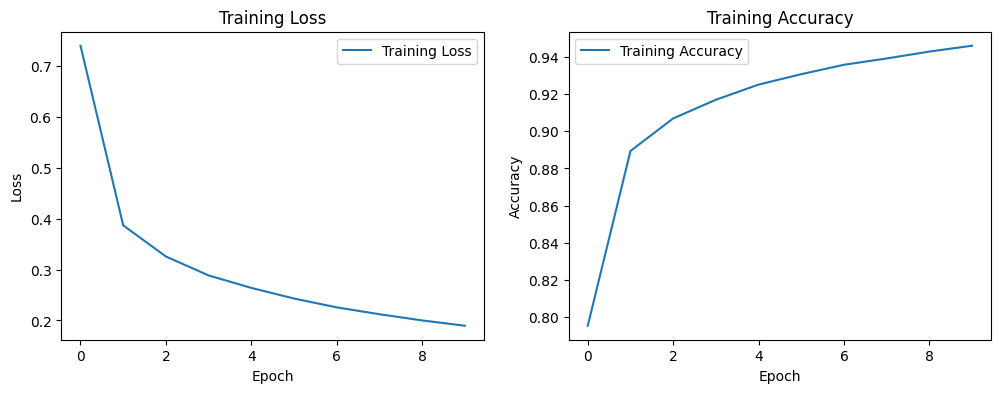

In [4]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

# Define the image data generator for training
train_datagen = ImageDataGenerator(rescale=1.0/255)  # Normalize pixel values to [0, 1]

# Specify the directory where your training images are located
train_generator = train_datagen.flow_from_directory(
    'Datasets/minist-jpg/train/',
    target_size=(28, 28),  # Set the target image size (adjust as needed)
    color_mode='grayscale',  # Set to 'grayscale' if your images are in grayscale
    batch_size=32,  # Adjust batch size as needed
    class_mode='categorical',  # Use 'categorical' for multiclass classification
    shuffle=True
)

# Define the network architecture
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=(28, 28, 1)),  # Input shape should match your target_size and color_mode
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')  # Replace num_classes with the number of classes in your dataset
])

# Compile the model
model.compile(optimizer='sgd',
              loss='categorical_crossentropy',  # Use 'categorical_crossentropy' for multiclass classification
              metrics=['accuracy'])

# Train the model
history = model.fit(train_generator, epochs=10)  # Adjust the number of epochs as needed

# Evaluate the network on your separate test dataset
# Replace 'path_to_your_test_dataset' with the path to your test dataset
test_datagen = ImageDataGenerator(rescale=1.0/255)  # Normalize pixel values to [0, 1]
test_generator = test_datagen.flow_from_directory(
    'Datasets/minist-jpg/test/',
    target_size=(28, 28),
    color_mode='grayscale',
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Set to False to maintain order for evaluation
)
test_loss, test_acc = model.evaluate(test_generator)

# Print test accuracy
print("Test accuracy:", test_acc)

# Plot the training loss and accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.title('Training Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training Accuracy')

plt.show()